In [1]:
import os
os.chdir("C:\\Users\\hr\\Downloads\\Analytics-Vidhya-Hackathons\\Agriculture-Hackathon")

### Problem Statement

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

### Hypothesis Generation

Here are some questions that came into my mind when i'm developing a hypothesis for solving this problem.

* Does the increase in estmated insect counts per square meter affect the crops?
* Does the number of doses of pesticide used on the crop causes the crop to damage?
* Does the seasons affect damage to the crops?
* Does the crops currently using pesticides are likely to damage?
* Does the crops having used pesticides in the past are likely to damage?
* Does the crops that never used pesticides are likely to damage?
* Does the category of the Soil likely to affect the damage to crops?

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from IPython.display import Image
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

### Importing the Datasets to Develop the Model

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("ss.csv")

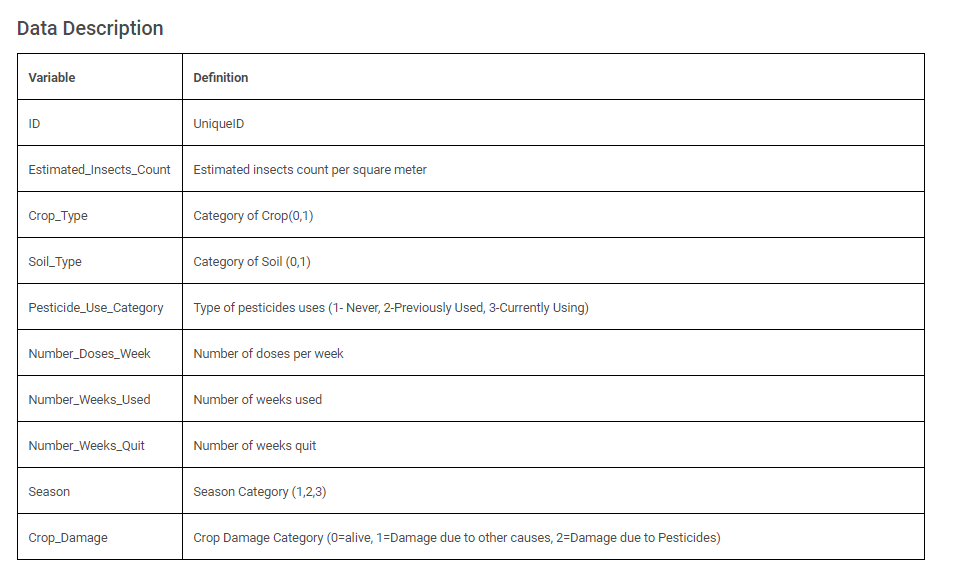

In [5]:
Image("C:\\Users\\hr\\Downloads\\Analytics-Vidhya-Hackathons\\Agriculture-Hackathon\\Janatahack-Machine-Learning-in-Agriculture1.png")

### Everything about given Dataset

In [6]:
train.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1


In [7]:
train.shape

(88858, 10)

In [8]:
test.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2


In [9]:
test.shape

(59310, 9)

In [10]:
ss.head(2)

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1


In [11]:
ss.shape

(59310, 2)

In [12]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### Insights about Predictor variables and it's datatypes

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


As we can see that our entire dataset mostly consists of **numerical data** (int, float) and only ID column os of **'object'** datatype

* Now the first thing we need to do is to seperately analyse the target column from the train datasetwhich is **Crop Damage** and check it's distribution. And also remove the **ID** column from the train set because it is just a unique identifier and does not impact the training the model and making the predictions.
* Machine Learning model works only on the numbers. So, we need to convert the string type values in the predictor variables to the numbers. Luckily, in this dataset, we do not have any string values as predictor variables.

In [14]:
id_col, target_col = 'ID', 'Crop_Damage'

In [15]:
print(f'\nTrain Set Contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest Set Contains {test.shape[0]} samples and {test.shape[1]} variables')


Train Set Contains 88858 samples and 10 variables

Test Set Contains 59310 samples and 9 variables


### Target Distribution

As we can see from this distribution that it is clearly a multi-class classification problem. It has 3 class (0,1,2) in our dataset.

In [16]:
train[target_col].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

Here the target variable categorites distribution representation is as shown below:
* 0 = Alive
* 1 = Damage due to other causes
* 2 = Damage due to Pesticides

Text(0.5, 1.0, 'Distribution of Crop Damage Variable')

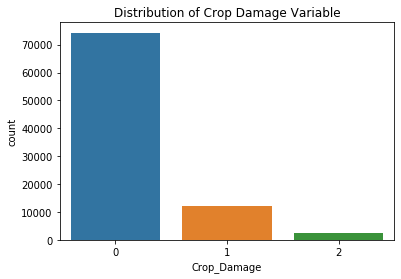

In [17]:
sns.countplot(train[target_col])
plt.title("Distribution of Crop Damage Variable", fontsize=12)

In [18]:
train[target_col].value_counts(normalize=True)

0    0.835468
1    0.138502
2    0.026030
Name: Crop_Damage, dtype: float64

Our data tells us quite obvious that this is an imbalanced dataset with 83.5% of values in Category-0 and 13.8% of values come under category-1 and finally only 2.6% of values come under the category-2. So, there is a vast difference between each and every distribution. Let's see more by performing the EDA and see what insights can we get from this.

### Exploratory Data Analysis

##### Null Values

Since most of the Machine Learning algorithms do not work when there are null values in your dataset. So, you need to identify the null values and handle those values appropriately. Firstly, we look at the distribution of the Null values in all the predictor and response variables in your dataset.

In [19]:
null_values_train = train.isnull().sum()
null_values_test = test.isnull().sum()
null_values_train, null_values_test
total_values_train = np.product(train.shape)
total_values_test = np.product(test.shape)
percent_null_train = (null_values_train/total_values_train)*100
percent_null_test = (null_values_test/total_values_test)*100
percent_null_train, percent_null_test

(ID                         0.000000
 Estimated_Insects_Count    0.000000
 Crop_Type                  0.000000
 Soil_Type                  0.000000
 Pesticide_Use_Category     0.000000
 Number_Doses_Week          0.000000
 Number_Weeks_Used          1.012852
 Number_Weeks_Quit          0.000000
 Season                     0.000000
 Crop_Damage                0.000000
 dtype: float64, ID                         0.000000
 Estimated_Insects_Count    0.000000
 Crop_Type                  0.000000
 Soil_Type                  0.000000
 Pesticide_Use_Category     0.000000
 Number_Doses_Week          0.000000
 Number_Weeks_Used          1.103992
 Number_Weeks_Quit          0.000000
 Season                     0.000000
 dtype: float64)

It seems that the train and test data has most of the null values only in one predictor variable, that is **"Number of Weeks Used"**. As we can also see that 1% of the data is missing from both the train and test datasets from this column.

##### Unique Values

Let's find out the number of unique values in each and every predictor variable so that we will have an idea about this data distribution.

In [20]:
train.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
dtype: int64

In [21]:
test.nunique()

ID                         59310
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
dtype: int64

Let's consider a train dataset.
* It has the columns named **Crop Type**, **Soil Type**, **Pesticide Use Category**, **Season** and **Crop Damage** variables with very few unique values that is 2 or 3 unique values in their list. So, these can be considered as the categortical variabes.
* **ID** column is a unique identifier for every record in this dataset. So, I'm not conidering it in the Analysis part.
* Now let's consider the columns **Estimated Insects Count**, **Number of Doses per Week**, **Number of Weeks used**, and **Number of Weeks to quit** which has multiple unique numerical values. So, we will consider them as a continuous variable.

### Analyzing Each Variable and their Relationships

There are two types of features that we have:

* Categorical
* Numerical

Also our **target variable** has **3 Classes**. So, this problem comes under the **Multi-Class Classification** problem.

Fo each feature, we perform 2 types of Analysis :

* **Univariate Analysis** : Analyzing 1 feature at a time.
* **Bivariate Analysis** : Analyzing 2 features at a time.

In [22]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

##### Segregating the Categorical and Numerical Features

In [23]:
cat_cols = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season','Crop_Damage']
num_cols = ['Number_Doses_Week','Number_Weeks_Used','Estimated_Insects_Count','Number_Weeks_Quit']

In [24]:
features = [c for c in train.columns if c not in [id_col, target_col]]
print(f'\nThe dataset contains {len(features)} features')


The dataset contains 8 features


#### Categorical Features

Now, let's start with analyzing the distribution of the Categorical Variables in this training Dataset.

##### Univariate Categorical Distribution

**1. Pie Chart** : Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

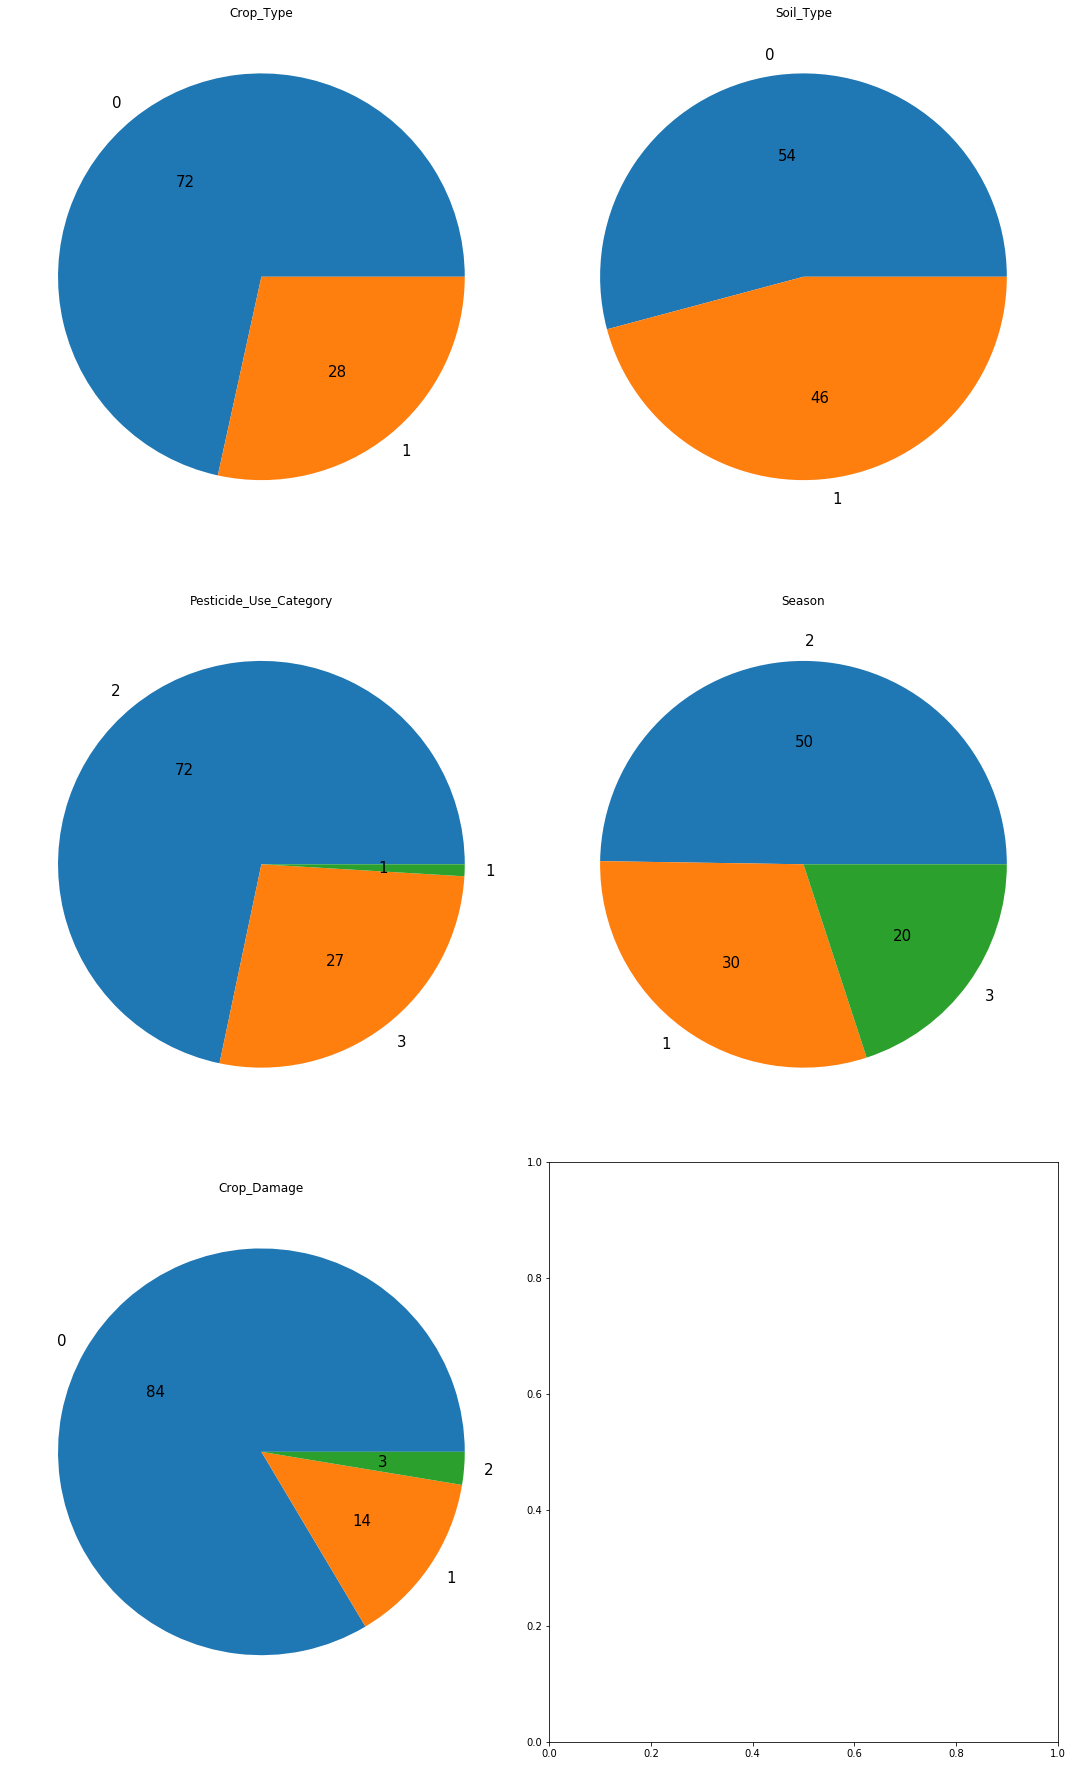

In [25]:
fig, axes = plt.subplots(3,2, figsize=(15,25))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(train[cat_cols]):
    _=train[c].value_counts().plot(kind='pie',ax=axes[i],title=c,autopct='%.0f', fontsize=15)
    _=axes[i].set_ylabel('')
_= plt.tight_layout()

**2. Count Plots** : Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable 

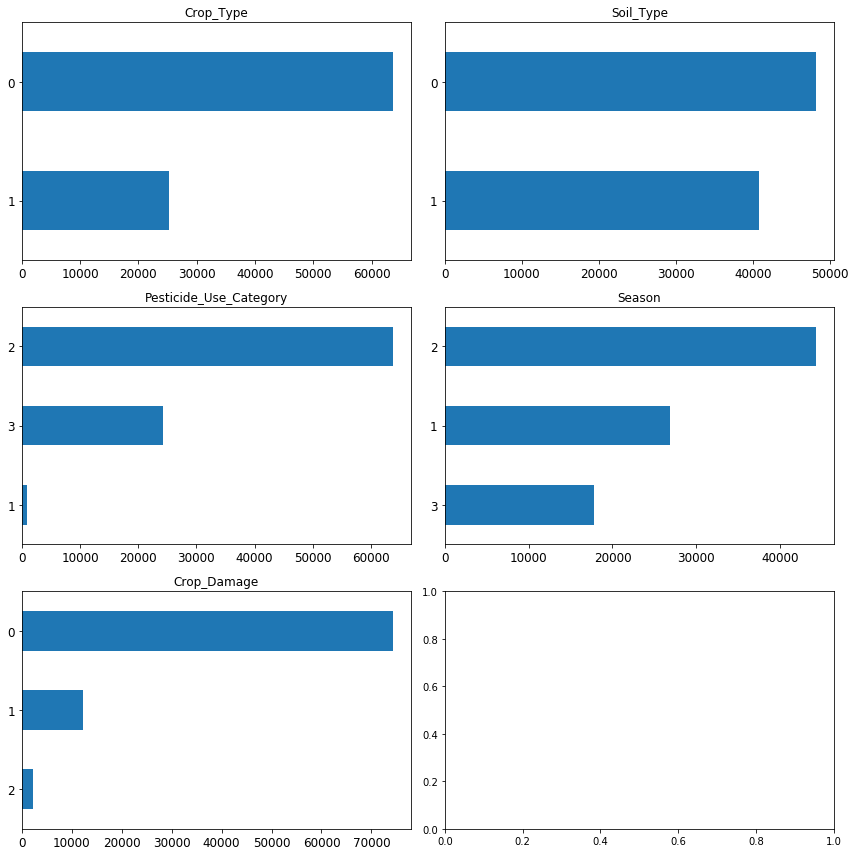

In [26]:
fig, axes = plt.subplots(3,2, figsize=(12,12))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(cat_cols):
    _=train[c].value_counts()[::-1].plot(kind='barh', ax=axes[i],title=c, fontsize=12)
_=plt.tight_layout()

### Bivariate Analysis Relationship with Target

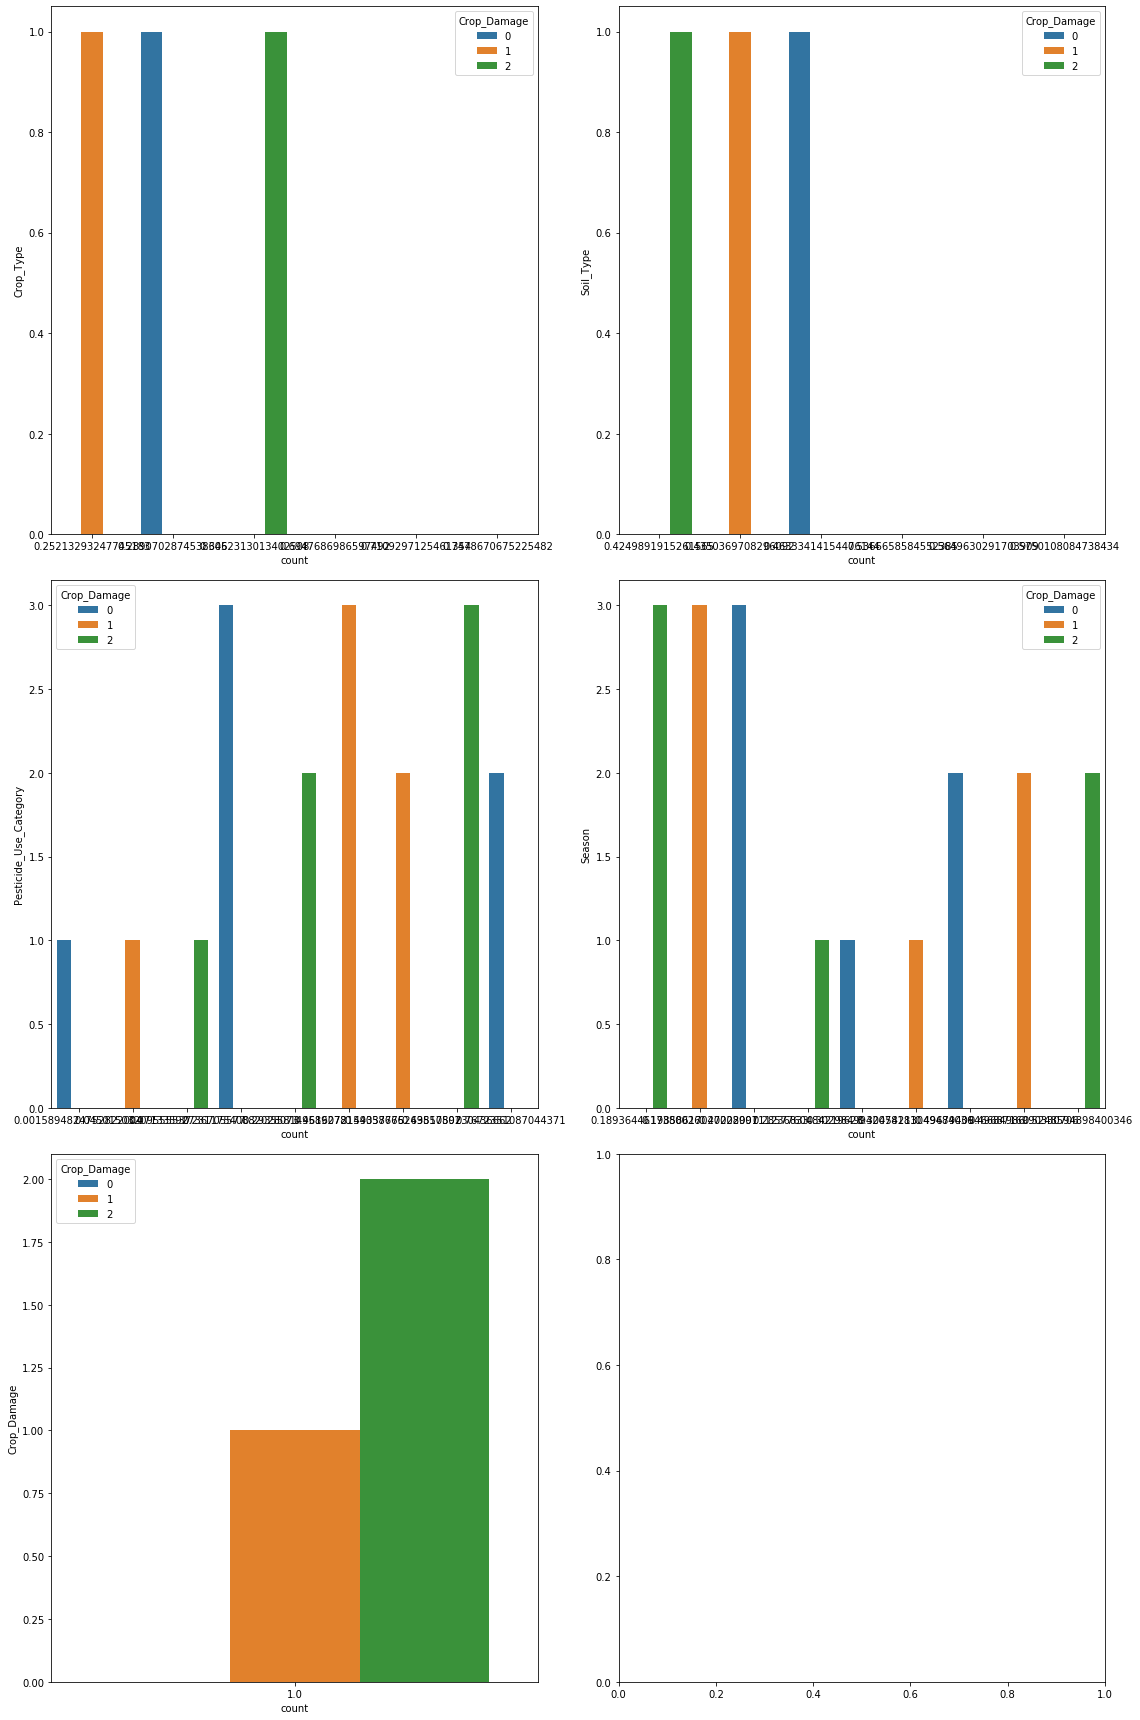

In [27]:
fig, axes = plt.subplots(3,2, figsize=(16,24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(train[cat_cols]):
    fltr_1=train[target_col]==0
    fltr_2=train[target_col]==1
    fltr_3=train[target_col]==2
    vc_a = train[fltr_1][c].value_counts(normalize=True).reset_index().rename({'index':c, c:'count'}, axis=1)
    vc_b = train[fltr_2][c].value_counts(normalize=True).reset_index().rename({'index':c, c:'count'}, axis=1)
    vc_c = train[fltr_3][c].value_counts(normalize=True).reset_index().rename({'index':c, c:'count'}, axis=1)
    vc_a[target_col]=0
    vc_b[target_col]=1
    vc_c[target_col]=2
    df = pd.concat([vc_a,vc_b,vc_c]).reset_index(drop=True)
    _=sns.barplot(y= c, x= 'count', data= df, hue = target_col, ax=axes[i])
_= plt.tight_layout()

**Does the Seasons affect damage to crop?**

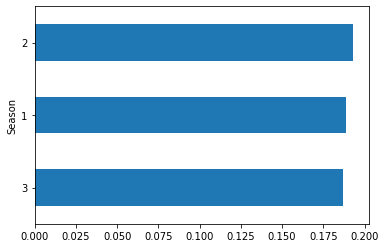

In [28]:
_= train.groupby('Season')[target_col].mean().sort_values().plot(kind='barh')

**Does the category of the Soil likely to affect the damage to crops?**

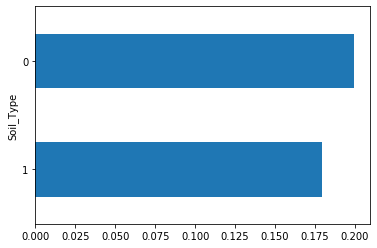

In [29]:
_= train.groupby('Soil_Type')[target_col].mean().sort_values().plot(kind='barh')

**Does the crops currently using pesticides are likely to damage?**

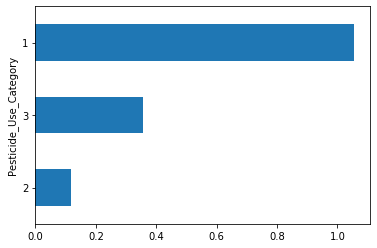

In [30]:
_=train.groupby('Pesticide_Use_Category')[target_col].mean().sort_values().plot(kind='barh')

#### Numerical Features

**1. Box Plots**

Box Plot can be used to see the spread of the numerical variables, and identify outliers

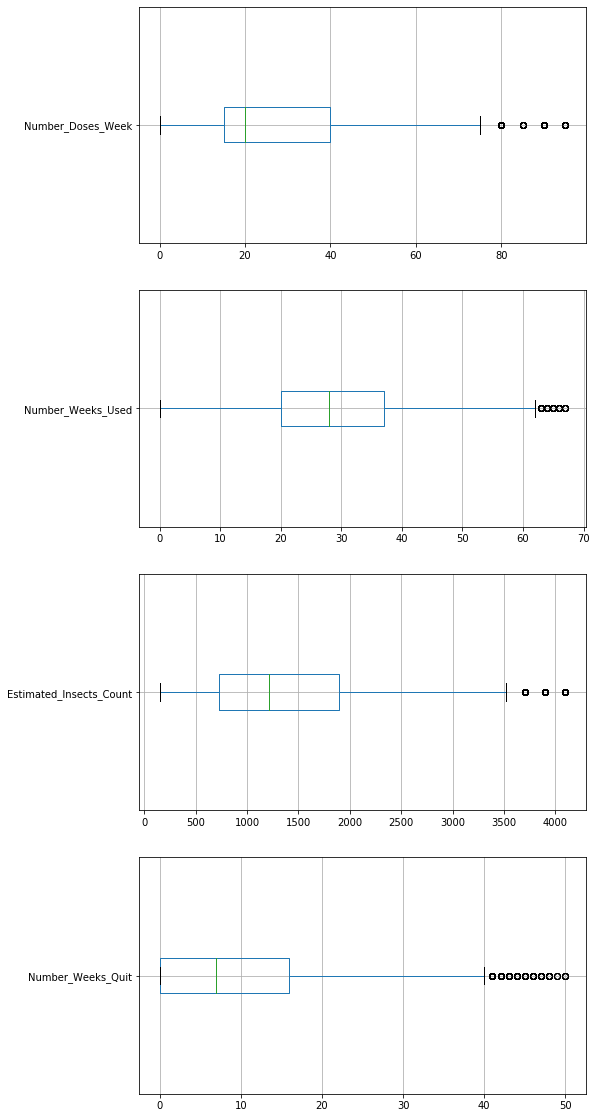

In [31]:
fig, axes = plt.subplots(4,1, figsize=(8,20))
for i,c in enumerate(num_cols):
    _=train[[c]].boxplot(ax=axes[i],vert=False)

As we can see from the Box Plot that there are many outliers in the dataset.

**2. Density Plots**

A Kernel Density Estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

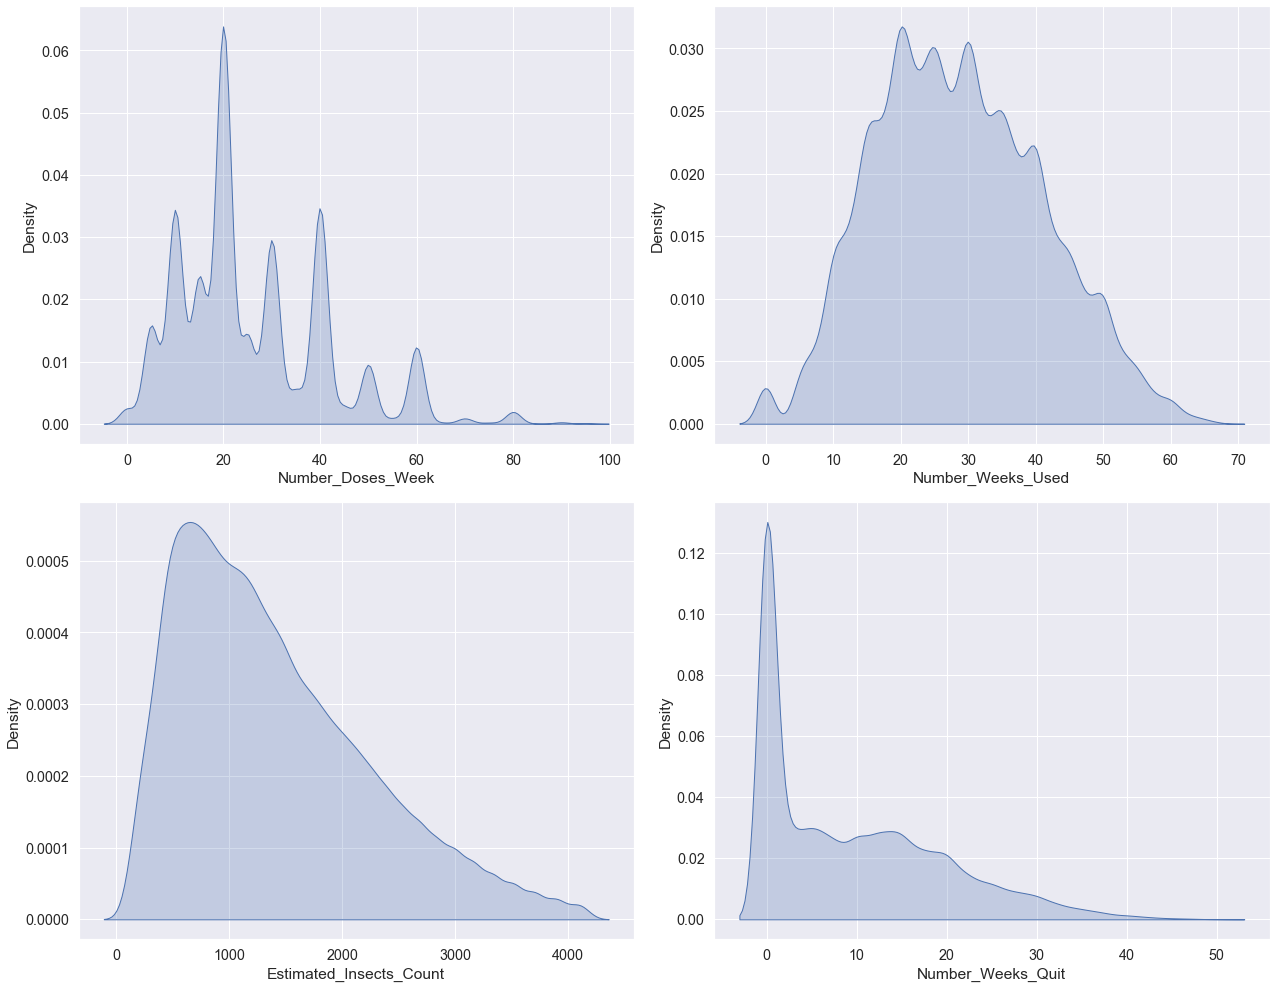

In [32]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2,2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(num_cols):
    plot = sns.kdeplot(data = train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

**3. Bivariate Analysis KDE Plots**

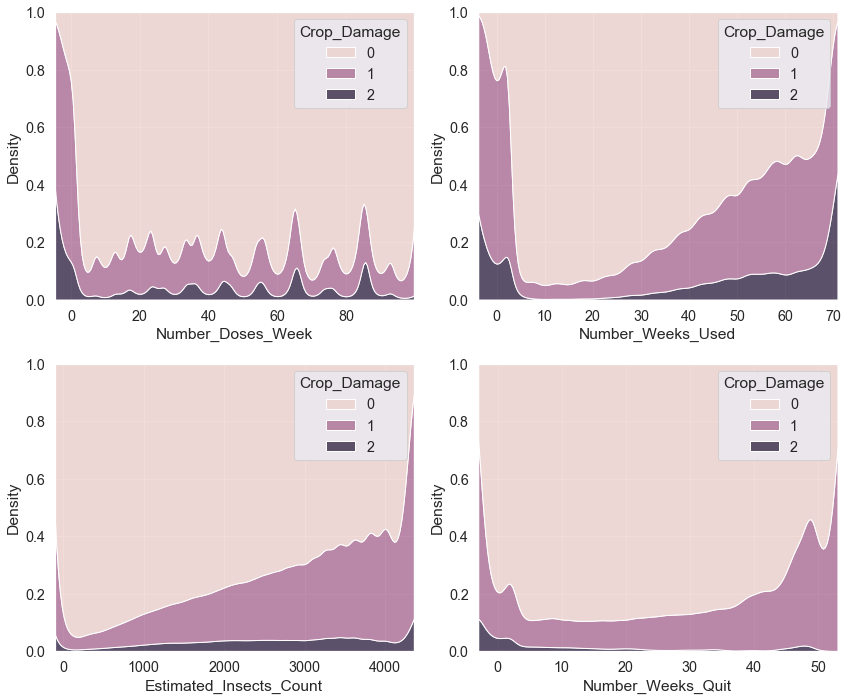

In [33]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, hue=target_col, multiple='fill', ax=axes[i])
plt.tight_layout()

##### **4. Bivariate Analysis - Correlation Heatmaps**

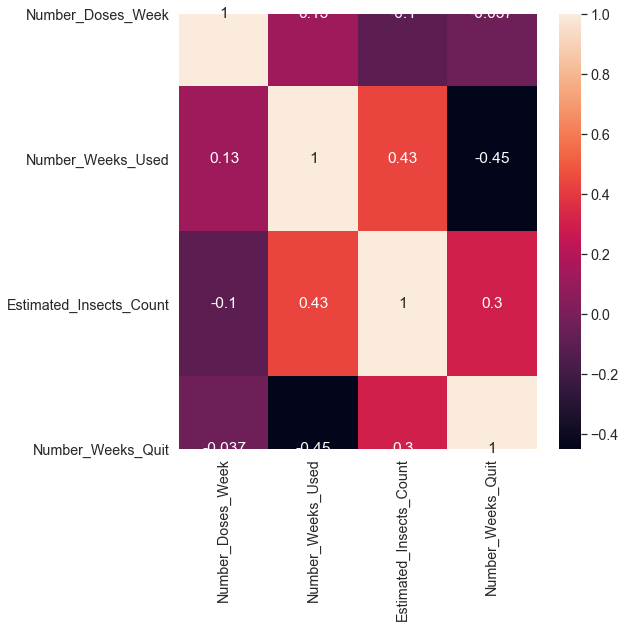

In [34]:
plt.figure(figsize=(8,8))
_=sns.heatmap(train[num_cols].corr(), annot=True)

##### Create a function to download the Predictions

In [35]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[target_col] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

### Model Prediction Process

* Concatenate/Join the train and test Datasets. All kinds of processing must be performed on both train and test datasets together.

* Convert all Categorical Variables to numbers. We will be useing suitable Encoding techniques for this.

* Fill Null Values. This can be followed by other data processing and feature engineering steps, but we will go into it later.

* Split the dataset back into train and test datasets.

* Split the train set into train and validation sets.

* Fit a classification Model on train, check its results on validation set.

* Predict for the test set.

* Save the submission as a csv file and submit the model.

Let's look into each and every individual step seperately and pre-process the raw data in such a way that the algorithm can make all the predictions on the test set.

**1. Concatenate the Train and Test Sets**

In [36]:
train.shape, test.shape

((88858, 10), (59310, 9))

In [37]:
88858+59310

148168

In [38]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.shape

(148168, 10)

In [39]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


**2. Convert Categorical Variables to Numbers** : Since our Machine Learning algorithm deals only with numbers and string data is not recognized by the Algorithm, we convert all the categories to the numbers by assigning each number to a category. Here, in this dataset we dont have to use any encoding techniques because the data we get is already in the form of Numbers or a numerical value. So, this step can be ignored

**3. Handling Null Values**

In [40]:
null = df.isnull().sum()
null

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
dtype: int64

In [41]:
total_values = np.product(df.shape)
percent_missing_values = (null/total_values)*100
percent_missing_values

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          1.005143
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                4.002889
dtype: float64

In [42]:
df['Number_Weeks_Used'].median()

28.0

Here in this problem we will replace all the null values in the training dataset with the Median values because we have outliers in the dataset and mean will be sensitive to outliers.

In [43]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].median(), inplace=True)

In [44]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop=True)
features = [c for c in train_proc.columns if c not in [id_col, target_col]]

In [45]:
len(features)

8

**5. Split the Train Dataset into the Train and Validation set**

We will use 80 - 20 split for the train and validation splits of the rows belonging to training data. Stratified Sampling is necessary since the dataset is highly unbalanced. Stratified Sampling ensures that the minority class is distributed in equal proportions among the classes.

In [46]:
trn, val = train_test_split(train_proc, test_size=0.2, random_state=10, stratify=train_proc[target_col])
trn.shape, val.shape

((71086, 10), (17772, 10))

In [47]:
x_trn, x_val = trn[features], val[features]
y_trn, y_val = trn[target_col], val[target_col]
x_test = test_proc[features]

### Training Different Machine Learning Models

#### 1. Decision Tree Classifer

In [57]:
dt_model = DecisionTreeClassifier(random_state=10)
_=dt_model.fit(x_trn,y_trn)
preds_val = dt_model.predict(x_val)
accuracy_score(y_val, preds_val)

0.7539387801035337

**Hyperparameter Tuning of Decision Trees**

In our decision tree model earlier, we did not change any of the parameters that were input to our model. However hyper-parameters and their values vary from dataset to dataset, and their optimal values have a large impact on the performance of our model.

To perform hyperparameter-tuning we specify a list of hyper-parameters to tune and their possible values.

For example:

max_depth: [6, 9, 12, 15]
learning_rate: [0.0001, 0.005, 0.01, 0.05]
etc.

##### A.) Grid Search

In grid search we try all possible combinations from the values of hyperparameters provided, to find the optimal hyper-parameter combination. However as the number of hyperparameters and their possible values grows, doing a grid search becomes infeasible.

Consider there are 5 hyperparameters to tune, and each of them 5 have different possible values.

Then total possible combinations of hyperparameters will be:

5 x 5 x 5 x 5 x 5 = 3125.

So you will have to wait for your model to run 3125 times, before getting the optimal set of hyperparameters.

If you still think you want to run it these many times, you are most welcome :)

In [65]:
params = {'max_leaf_nodes': [2,4,8,16,32,64,128,256], 'min_samples_split':[2,3,4,5], 'criterion': ['gini','entropy']}
grid_cv = GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy',cv=5, verbose=1)
search=grid_cv.fit(train_proc[features], train_proc[target_col])
search.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   45.2s finished


{'criterion': 'entropy', 'max_leaf_nodes': 128, 'min_samples_split': 2}

In [67]:
dt_model_tune = DecisionTreeClassifier(random_state=10, criterion='entropy', max_leaf_nodes = 128, min_samples_split=2)
_=dt_model_tune.fit(x_trn,y_trn)
preds_val_tune = dt_model_tune.predict(x_val)
accuracy_score(y_val, preds_val_tune)

0.8441931127616475

**0.8441**, that's quite a big boost, this parameter is extrmely important for this data distribution.

In [71]:
preds_test_dt = dt_model_tune.predict(x_test)
download_preds(preds_test_dt, file_name='tuned_dt.csv')

#### 2. Random Forest Classifier

In [72]:
rf = RandomForestClassifier(n_estimators = 100, random_state=10)
_=rf.fit(x_trn, y_trn)
rf_preds_val = rf.predict(x_val)
accuracy_score(y_val, rf_preds_val)

0.8248368219671394

In [75]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [2,4,8,16,32,64,128,256]}
rf_tune = RandomizedSearchCV(estimator = rf, param_distributions=params, n_iter = 10, cv = 5, random_state=10, n_jobs=-1)
rf_tune.fit(x_trn,y_trn)
rf_tune_preds = rf_tune.predict(x_val)
accuracy_score(y_val, rf_tune_preds)

0.8432928201665542

In [77]:
rf_tune.best_params_

{'n_estimators': 64,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [80]:
rf_tune_hyp = RandomForestClassifier(n_estimators=64, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10, bootstrap=False, random_state=10)
_=rf_tune_hyp.fit(x_trn,y_trn)
rf_tune_preds = rf_tune_hyp.predict(x_val)
accuracy_score(y_val, rf_tune_preds)

0.8432928201665542

In [81]:
preds_test_rf = rf_tune_hyp.predict(x_test)
download_preds(preds_test_rf, file_name='tuned_rf.csv')

##### 3. Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
_=gnb.fit(x_trn, y_trn)
y_pred = gnb.predict(x_val)
accuracy_score(y_val, y_pred)

0.8226986270537925

In [49]:
preds_test_nb = gnb.predict(x_test)
download_preds(preds_test_nb, file_name='naive_bayes.csv')

##### 4. K Nearest Neighbors Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=16)
_=knn.fit(x_trn,y_trn)
y_pred_knn = knn.predict(x_val)
accuracy_score(y_val, y_pred_knn)

0.8358091379698402

In [56]:
preds_test_knn = knn.predict(x_test)
download_preds(preds_test_knn, file_name='knn.csv')

**Hyperparameter Tuning of KNN Classifier**

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_tune = KNeighborsClassifier()
clf=GridSearchCV(knn_tune, hyperparameters, cv=5)
best_model = clf.fit(x_trn, y_trn)
best_model.best_estimator_.get_params()